![](./lesson12/1.jpg)

![](./lesson12/2.jpg)

## 12.1 数据预处理

In [1]:
# 1 导入所需模块
import urllib.request
import os
import tarfile
import pandas as pd
import numpy as np

In [2]:
# 2 读取泰坦尼克号数据集
all_df = pd.read_excel('./data/titanic3.xls')

In [3]:
# 3 选取所需要的字段
cols = ['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
all_df = all_df[cols]

In [4]:
# 4 依照8:2 的比例将数据分为训练数据和测试数据
msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [5]:
# 5 显示训练数据和测试数据项数
print(' total : ', len(all_df))
print(' train : ', len(train_df))
print(' test : ', len(test_df))

 total :  1309
 train :  1043
 test :  266


In [6]:
from sklearn import preprocessing

In [7]:
# 将训练数据和测试数据进行预处理， 预处理过程参考上节预处理
def PreprocessData(raw_df):
    print(' origin data is preprocessing...')
#     删除name字段，对age，fare空数据进行均值填充
    df = raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
#     字符串类型sex转为int类型
    df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
#     对embarked字段进行oneHot 编码
    x_OneHot_df = pd.get_dummies(data=df, columns=['embarked'])
    
#     预处理基本完成， 把dataframe 转成array
    ndarray = x_OneHot_df.values
#     返回数据为 特征值 和 标签
    Features = ndarray[:, 1:]
    Label = ndarray[:, 0]
    
#     最后把特征值进行标准化处理，使训练效果更好，预测结果更加精确
    minmax_scale = preprocessing.MinMaxScaler()
    scaledFeatures = minmax_scale.fit_transform(Features)
    print(' processing is ok')
    return scaledFeatures, Label

In [8]:
train_features, train_label = PreprocessData(train_df)
test_features, test_label = PreprocessData(test_df)

 origin data is preprocessing...
 processing is ok
 origin data is preprocessing...
 processing is ok


***

## 12.2 建立模型

### 将建立一下多层感知器模型，输入层（9个神经元），隐藏层1（40个神经元）， 隐藏层2（30个神经元），输出层（1个神经元）， 如下图所示

![](./lesson12/3.jpg)

In [9]:
# 导入所需模块
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\python\Anaconda3\envs\tensorFLow

In [10]:
# 建立一个线性堆叠模型，后续只需要把各个神经网络层加入即可
model = Sequential()

In [11]:
# 建立隐藏层1与输入层1
model.add(Dense(units=40,
                               input_dim=9,
                               kernel_initializer='uniform',
                               activation='relu'))

### 参数解释
- **units=40:** 输出是“隐藏层1” 共有40个神经元
- **input_dim=9:** 输入层有9个神经元的输入，因为数据预处理后有9个特征值字段
- **kernel_initializer='uniform':** 使用 unisorm distribution分布的随机数初始化 weight 和 bias
- **activation='relu':** 定义激活函数 ReLU

In [12]:
# 建立隐藏层2和输入层2
model.add(Dense(units=30,
                               kernel_initializer='uniform',
                               activation='relu'))

### 参数解释
- **units=30:** 输出是“隐藏层1” 共有30个神经元
- **kernel_initializer='uniform':** 使用 unisorm distribution分布的随机数初始化 weight 和 bias
- **activation='relu':** 定义激活函数 ReLU

In [13]:
# 建立输出层
model.add(Dense(units=1,
                               kernel_initializer='uniform',
                               activation='sigmoid'))

***

## 12.3 开始训练

### 建立好模型后，可以使用 _<u>反向传播法</u>_ 进行训练


In [14]:
# 1 定义训练方式， 在模型训练之前，必须先对模型进行设置
# binary_crossentropy（亦称作对数损失，logloss）
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# 2 开始训练
train_history = model.fit(x=train_features, y=train_label, validation_split=0.1, epochs=30, batch_size=30, verbose=2)

Train on 938 samples, validate on 105 samples
Epoch 1/30
 - 1s - loss: 0.6891 - acc: 0.6002 - val_loss: 0.6642 - val_acc: 0.8000
Epoch 2/30
 - 0s - loss: 0.6645 - acc: 0.6013 - val_loss: 0.5693 - val_acc: 0.8000
Epoch 3/30
 - 0s - loss: 0.6087 - acc: 0.6642 - val_loss: 0.4809 - val_acc: 0.8190
Epoch 4/30
 - 0s - loss: 0.5489 - acc: 0.7495 - val_loss: 0.4629 - val_acc: 0.8095
Epoch 5/30
 - 0s - loss: 0.5142 - acc: 0.7676 - val_loss: 0.4294 - val_acc: 0.8095
Epoch 6/30
 - 0s - loss: 0.4945 - acc: 0.7676 - val_loss: 0.4316 - val_acc: 0.8095
Epoch 7/30
 - 0s - loss: 0.4878 - acc: 0.7751 - val_loss: 0.4231 - val_acc: 0.8095
Epoch 8/30
 - 0s - loss: 0.4856 - acc: 0.7783 - val_loss: 0.4190 - val_acc: 0.8095
Epoch 9/30
 - 0s - loss: 0.4770 - acc: 0.7751 - val_loss: 0.4157 - val_acc: 0.8286
Epoch 10/30
 - 0s - loss: 0.4738 - acc: 0.7900 - val_loss: 0.4114 - val_acc: 0.8571
Epoch 11/30
 - 0s - loss: 0.4734 - acc: 0.7846 - val_loss: 0.4099 - val_acc: 0.8095
Epoch 12/30
 - 0s - loss: 0.4704 - acc:

![](./lesson12/4.jpg)

In [16]:
# 建立show_train_history显示训练过程
# 可以使用如下方法，读取train_history，以图表显示训练过程。
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel('Train')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

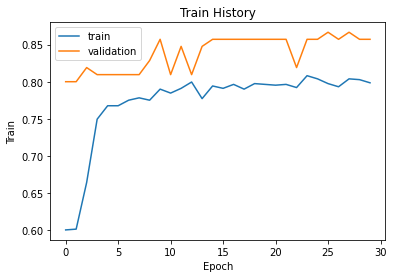

In [17]:
# 画出准确率的执行结果
show_train_history(train_history, 'acc', 'val_acc')

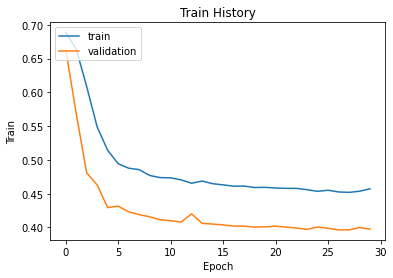

In [18]:
# 画出误差的执行结果
show_train_history(train_history, 'loss', 'val_loss')

***

## 12.4 评估模型准确率

### 已经训练完成模型，现在使用验证集test来评估模型的准确率

In [19]:
scores = model.evaluate(x=test_features, y=test_label)
print(scores[1])

266/266 [==============================] - 0s 38us/step
0.7894736846586815


#### 从以上结果可以看出，准确率为 0.78
***

## 10.5 加入《泰坦尼克号》电影中Jack 和 Rose 的数据

![](./lesson12/5.jpg)

In [20]:
Jack = pd.Series([0, 3, 'Jack', 'male',  23, 1, 0, 5.0000, 'S'])
Rose = pd.Series([1, 1, 'Rose', 'female', 20, 1, 0, 100.0000, 'S'])

In [24]:
# 创建Jack和Rose的DataFrame
JR_df = pd.DataFrame([list(Jack), list(Rose)], columns=['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'])

In [25]:
JR_df

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,0,3,Jack,male,23,1,0,5.0,S
1,1,1,Rose,female,20,1,0,100.0,S


In [26]:
# JR_df 加入all_df
all_df = pd.concat([all_df, JR_df])

In [27]:
# 查看最后两项数据，是否拼接成功
all_df[-2:]

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,0,3,Jack,male,23.0,1,0,5.0,S
1,1,1,Rose,female,20.0,1,0,100.0,S


## 12.6 进行预测

In [28]:
# 执行数据预处理
all_Features, all_Label = PreprocessData(all_df)

 origin data is preprocessing...
 processing is ok


In [29]:
# 执行预测
all_probability = model.predict(all_Features)

In [30]:
# 查看预测结果
all_probability[:5]

array([[0.9681405 ],
       [0.64581966],
       [0.96448296],
       [0.44576836],
       [0.96040815]], dtype=float32)

### 以上结果就是每一位旅客生存的概率

#### DataFrame.insert(loc, column, value, allow_duplicates=False)  
Insert column into DataFrame at specified location.
**Parameters:**
- loc : int, Insertion index. Must verify 0 <= loc <= len(columns)  要插入的那一列
- column : string, number, or hashable object, label of the inserted column    要插入那列的标签
- value : int, Series, or array-like
- allow_duplicates : bool, optional    布尔类型，可选择

In [31]:
# 将all_df 与 all_probability 整合成一个dataFrame

all_df_predict = all_df
all_df_predict.insert(len(all_df.columns), 'probability', all_probability)

In [32]:
# 查看Jack 和 Rose的预测结果
all_df_predict[-2:]

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,probability
0,0,3,Jack,male,23.0,1,0,5.0,S,0.134412
1,1,1,Rose,female,20.0,1,0,100.0,S,0.960866


***

## 12.7 找出泰坦尼克号背后的感人故事

![](./lesson12/6.jpg)

In [34]:
all_df_predict[(all_df_predict['probability']>0.9) & (all_df_predict['survived']==0)]

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,probability
2,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S,0.964483
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S,0.960408
105,0,1,"Evans, Miss. Edith Corse",female,36.0,0,0,31.6792,C,0.972695
169,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,28.7125,C,0.968959
286,0,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,221.7792,S,0.933705


### 查出以上这些人的存活概率极高， 但是最终却没有存活下来

In [35]:
all_df_predict[:5]

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,probability
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,0.968140
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,0.645820
2,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,0.964483
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,0.445768
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,0.960408


### Allison 家族的故事

![](./lesson12/7.jpg)

#### ...